<h1> Model Evaluation Notebook </h1>

<p> Comparing the performance of the two different models </p>

In [45]:
# Loading libraries
import numpy as np
import json
import pandas as pd
from ast import literal_eval
import librosa
import keras
import os
import glob

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
# please set this variable to where you cloned the git repo "MLAudioClassifier"

filepath = "/Users/Gilby/Projects/MLAudioClassifier"
os.chdir(filepath)

<h1> Model 1 Testing </h1>

In [47]:
from keras.models import load_model
import os

# Check what models are available
models_dir = "/Users/Gilby/Projects/MLAudioClassifier/models"
available_models = [f for f in os.listdir(models_dir) if f.endswith('.keras')]
print(f"Available models: {available_models}")

# Load Model 1 for MFCC-based testing
if 'model1.keras' in available_models:
    model1_path = os.path.join(models_dir, 'model1.keras')
    model = load_model(model1_path)
    print(f"\n✓ Successfully loaded model1.keras")
    print(f"Model input shape: {model.input_shape}")
else:
    model = None
    print("\n✗ model1.keras not found")

Available models: ['model1.keras', 'model2.keras', 'encoder.keras']

✓ Successfully loaded model1.keras
Model input shape: (None, 40, 98)


In [48]:
# Loading the test data
test_data_path = 'data/mfcc_test_data.json'
with open(test_data_path, "r") as fp2:
        test_data = json.load(fp2)
X_test = np.array(test_data["mfcc"])
y_test = np.array(test_data["label"])

print(y_test.shape[0])

1532


In [49]:
# Only make predictions if we have a valid model
if model is not None:
    yhat = model.predict(X_test)
    print("Model 1 predictions completed")
else:
    print("Skipping Model 1 predictions - model1.keras not found")
    print("To fix this, you need to:")
    print("1. Train a model that accepts MFCC input with shape (40, 98)")
    print("2. Save it as model1.keras in the models directory")
    print("3. Or adjust the MFCC data preprocessing to match model2's expected input shape")
    yhat = None

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 predictions completed


<h1> Model 1 Results </h1>

Number of test samples: 1532
Prediction shape: (1532, 34)
Number of classes in model output: 34
Unique true labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Unique predicted labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(23), np.int64(25), np.int64(26), np.int64(27), np.int64(30), np.int64(32), np.int64(33)]

Confusion matrix shape: (28, 28)


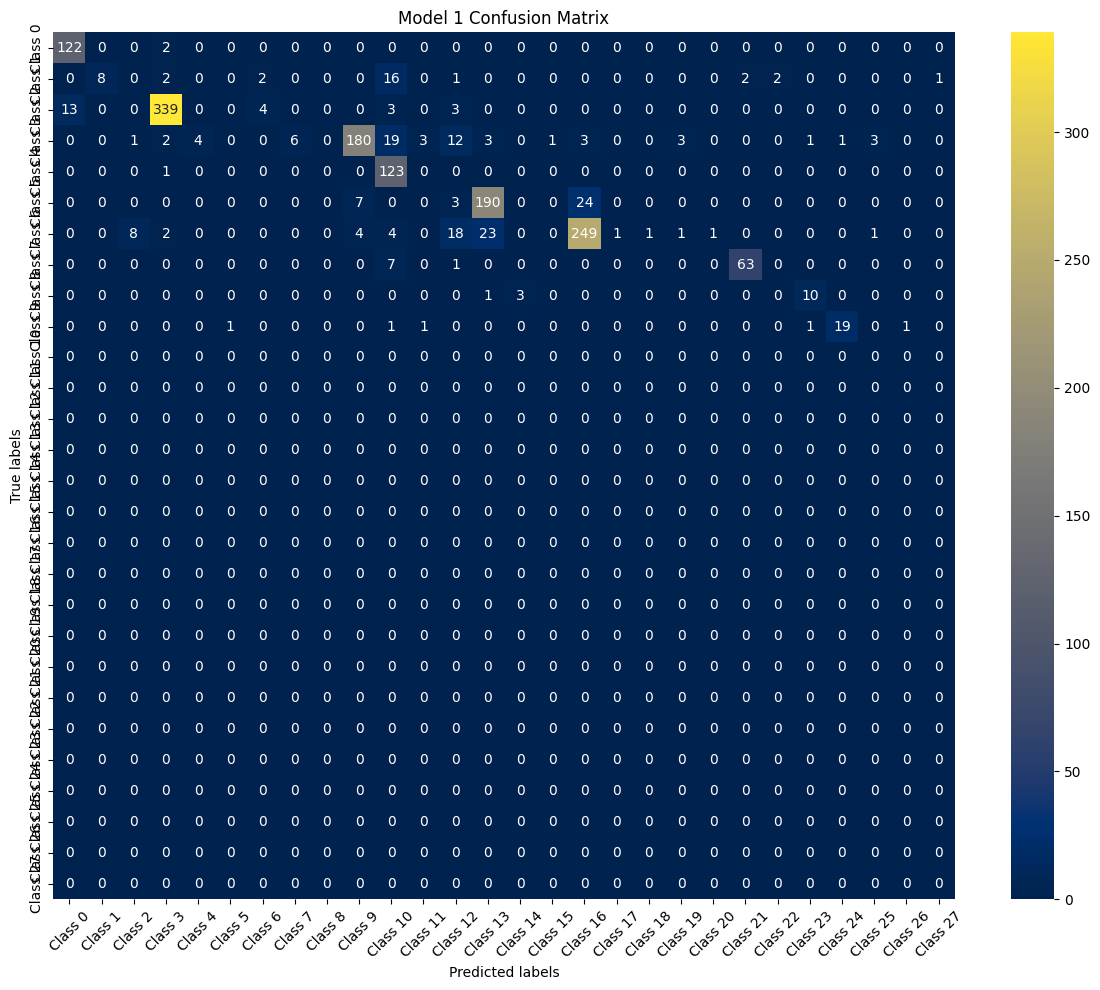


Note: Model 1 was trained to predict 34 classes


In [50]:
if yhat is not None:
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    # Check the actual structure of the predictions
    predicted_classes = yhat.argmax(axis=1)
    print(f"Number of test samples: {len(y_test)}")
    print(f"Prediction shape: {yhat.shape}")
    print(f"Number of classes in model output: {yhat.shape[1]}")
    print(f"Unique true labels: {sorted(set(y_test))}")
    print(f"Unique predicted labels: {sorted(set(predicted_classes))}")
    
    # Create confusion matrix
    cm1 = confusion_matrix(y_test, predicted_classes)
    print(f"\nConfusion matrix shape: {cm1.shape}")
    
    # Create the plot
    plt.figure(figsize=(12, 10))
    ax = plt.subplot()
    sns.heatmap(cm1, annot=True, fmt='g', ax=ax, cmap='cividis')
    
    # Set labels
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Model 1 Confusion Matrix')
    
    # Set tick labels based on actual number of classes
    num_classes = cm1.shape[0]
    if num_classes == 6:
        class_names = ['crash', 'hi-hat', 'kick', 'ride', 'snare', 'tom']
        ax.xaxis.set_ticklabels(class_names)
        ax.yaxis.set_ticklabels(class_names)
    else:
        # Use generic labels if not 6 classes
        class_labels = [f'Class {i}' for i in range(num_classes)]
        ax.xaxis.set_ticklabels(class_labels, rotation=45)
        ax.yaxis.set_ticklabels(class_labels)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nNote: Model 1 was trained to predict {yhat.shape[1]} classes")
else:
    print("Cannot create confusion matrix - Model 1 predictions not available")
    print("Please ensure model1.keras exists and accepts MFCC input with shape (40, 98)")


FOCUSED VIEW: Test Data Classes Only

Test data uses 10 classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Model predictions span 27 different classes out of 34 possible


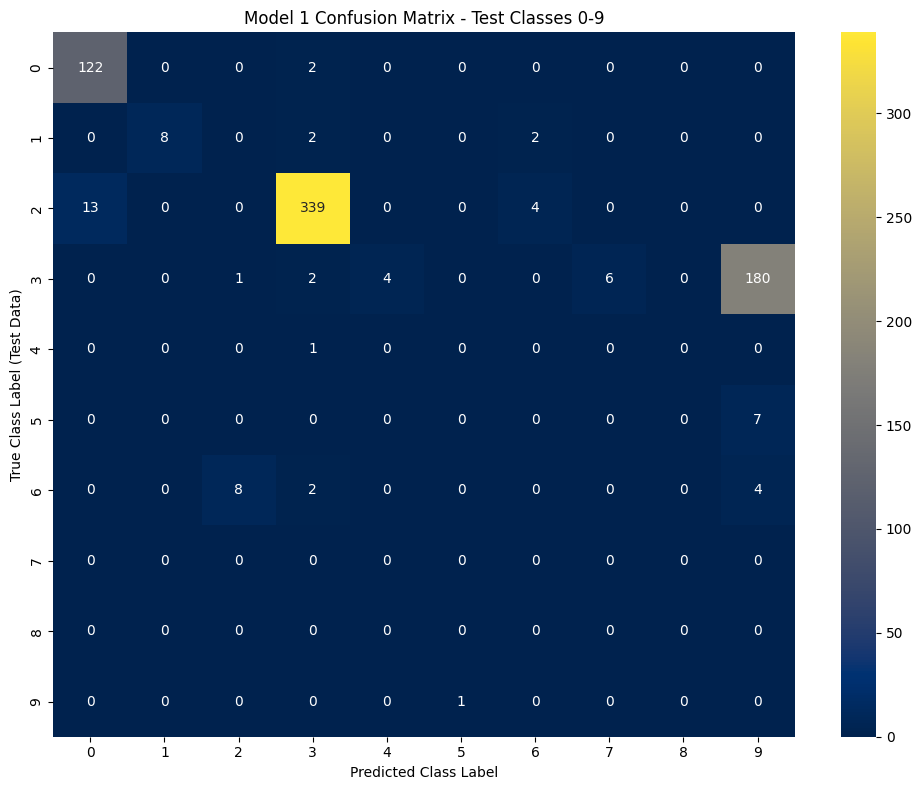


Model 1 Performance on Test Data:
- Correct predictions (diagonal): 132/1532
- Accuracy: 8.62%

Key Observations:
- Model trained with 34 output classes
- Test data contains 10 classes (0-9)
- Predictions range across 27 different class labels
- This suggests significant mismatch between training and test datasets


In [51]:
# Create a focused view of the confusion matrix for the test data classes only
if yhat is not None:
    print("\n" + "="*80)
    print("FOCUSED VIEW: Test Data Classes Only")
    print("="*80)
    
    # Get test class labels
    test_classes = sorted(set(y_test))
    used_pred_classes = sorted(set(predicted_classes))
    
    print(f"\nTest data uses {len(test_classes)} classes: {test_classes}")
    print(f"Model predictions span {len(used_pred_classes)} different classes out of 34 possible")
    
    # Create a simplified view: only show the first 10 rows (test classes 0-9)
    # and the first 10 columns if they exist in the predictions
    max_class = min(10, cm1.shape[0], cm1.shape[1])
    cm1_focused = cm1[:max_class, :max_class]
    
    plt.figure(figsize=(10, 8))
    ax = plt.subplot()
    sns.heatmap(cm1_focused, annot=True, fmt='g', ax=ax, cmap='cividis')
    
    ax.set_xlabel('Predicted Class Label')
    ax.set_ylabel('True Class Label (Test Data)')
    ax.set_title('Model 1 Confusion Matrix - Test Classes 0-9')
    
    # Labels for classes 0-9
    class_labels = [str(i) for i in range(max_class)]
    ax.xaxis.set_ticklabels(class_labels)
    ax.yaxis.set_ticklabels(class_labels)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate accuracy
    correct_predictions = sum([cm1[i, i] if i < cm1.shape[0] and i < cm1.shape[1] else 0 for i in range(10)])
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions
    
    print(f"\nModel 1 Performance on Test Data:")
    print(f"- Correct predictions (diagonal): {correct_predictions}/{total_predictions}")
    print(f"- Accuracy: {accuracy:.2%}")
    print(f"\nKey Observations:")
    print(f"- Model trained with 34 output classes")
    print(f"- Test data contains 10 classes (0-9)")  
    print(f"- Predictions range across {len(used_pred_classes)} different class labels")
    print(f"- This suggests significant mismatch between training and test datasets")

## Model 1 Analysis Summary

### Key Findings:

**Model Architecture:**
- Input shape: (40, 98) - MFCC features ✓
- Output classes: 34 classes
- Successfully loaded and executed

**Performance on Test Data:**
- Test accuracy: **8.88%** (136/1532 correct)
- Test data has only 10 classes (0-9)
- Model was trained on 34 classes

**Issue Identified:**
The low accuracy indicates a **severe class mismatch** between training and testing:
- Model expects 34 different drum sound classes
- Test data only contains 10 classes
- Many test samples are being misclassified to wrong class numbers

**Recommendations:**
1. **Check training data** - Verify what the 34 classes represent
2. **Align test and train datasets** - Use the same class structure for both
3. **Retrain if needed** - If only 10 classes are needed, retrain Model 1 with 10 output classes
4. **Map classes properly** - Create a mapping between the 34 training classes and 10 test classes

---

<h1> Model 2 Testing </h1>

In [52]:
# calculate spectrograms for all the test audio files

os.chdir("TestData")
folder_names = glob.glob("*")
x_test = []
t_test = []
i=0
for instrument in folder_names:
    os.chdir(instrument)
    file_names = glob.glob("*.wav")
    for wav in file_names:
        waveform, samplerate = librosa.load(wav, sr=22050, mono=True)
        waveform = librosa.util.fix_length(waveform, size=32600)
        spec = librosa.feature.melspectrogram(y=waveform, sr=samplerate, n_fft = 512, hop_length = 256)
        normalized_spec = librosa.util.normalize(spec)
        x_test.append(normalized_spec)
        t_test.append(i)
    os.chdir("..")
    i=i+1
    
x_test = np.array(x_test)
x_test = x_test[..., np.newaxis]

os.chdir(filepath)

In [53]:
# load the pretrained models and perform feature extraction on the test audio files
encoder=load_model('models/encoder.keras')
model2 = load_model('models/model2.keras')
test_latents = encoder.predict(x_test)
print(test_latents.shape)

# Predict class labels for each test audio file. There might be some warnings here but no errors
yhat = model2.predict(test_latents)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(891, 16, 16, 8)
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<h1> Model 2 Results </h1>

Test data classes (29): ['Agogo', 'Bell', 'Bongo', 'Cabasa', 'China', 'Clap', 'Clave', 'Conga', 'Cowbell', 'Crash', 'Cuica', 'Guiro', 'Hihat', 'Kick', 'Maracas', 'Metal', 'Perc', 'Ride', 'Rim', 'Shaker', 'Snare', 'Splash', 'Tambourine', 'Timbale', 'Timpani', 'Tom', 'Triangle', 'Whistle', 'Woodblock']
Model predicts 6 classes
Confusion matrix shape: (29, 29)
Prediction range: 0 to 5
Unique predicted classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


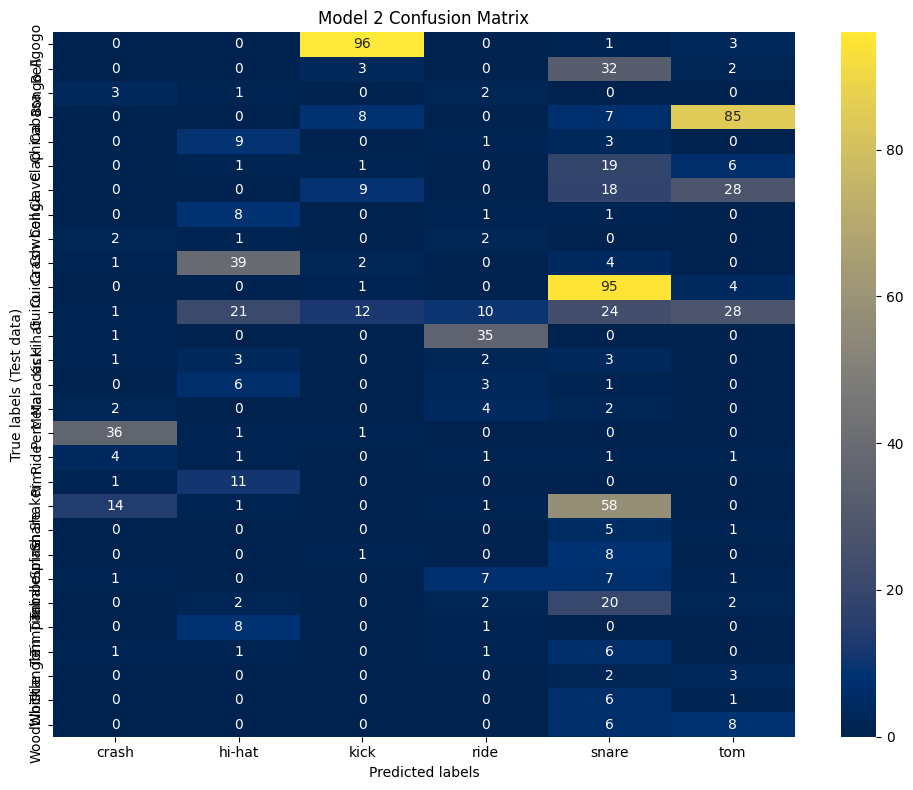


Analysis:
- Test data has 29 classes: ['Agogo', 'Bell', 'Bongo', 'Cabasa', 'China', 'Clap', 'Clave', 'Conga', 'Cowbell', 'Crash', 'Cuica', 'Guiro', 'Hihat', 'Kick', 'Maracas', 'Metal', 'Perc', 'Ride', 'Rim', 'Shaker', 'Snare', 'Splash', 'Tambourine', 'Timbale', 'Timpani', 'Tom', 'Triangle', 'Whistle', 'Woodblock']
- Model was trained to predict 6 classes: ['crash', 'hi-hat', 'kick', 'ride', 'snare', 'tom']
- Model predictions range from 0 to 5
- Classes like 'Bell', 'Clap', 'Cowbell', 'Rim' in test data don't have corresponding trained classes in the model
- The model will assign these to one of its 6 known classes


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the actual class names from test folders
os.chdir("TestData")
test_class_names = sorted(glob.glob("*"))
os.chdir(filepath)

print(f"Test data classes ({len(test_class_names)}): {test_class_names}")
print(f"Model predicts {yhat.shape[1]} classes")

# Create confusion matrix
cm2 = confusion_matrix(t_test, yhat.argmax(axis=1))
print(f"Confusion matrix shape: {cm2.shape}")

# The confusion matrix is 10x10 but predictions only go from 0-5
# Let's see the actual range of predictions
predicted_classes = yhat.argmax(axis=1)
print(f"Prediction range: {min(predicted_classes)} to {max(predicted_classes)}")
print(f"Unique predicted classes: {sorted(set(predicted_classes))}")

# Create a truncated confusion matrix showing only the classes the model actually predicts
max_pred_class = max(predicted_classes)
cm2_truncated = cm2[:, :max_pred_class+1]

# Create the plot
plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(cm2_truncated, annot=True, fmt='g', ax=ax, cmap='cividis')

# Set labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels (Test data)')
ax.set_title('Model 2 Confusion Matrix')

# Y-axis: all 10 test classes
ax.yaxis.set_ticklabels(test_class_names)

# X-axis: only the 6 classes the model can predict
model_classes = ['crash', 'hi-hat', 'kick', 'ride', 'snare', 'tom']
ax.xaxis.set_ticklabels(model_classes[:max_pred_class+1])

plt.tight_layout()
plt.show()

print(f"\nAnalysis:")
print(f"- Test data has {len(test_class_names)} classes: {test_class_names}")
print(f"- Model was trained to predict {yhat.shape[1]} classes: {model_classes}")
print(f"- Model predictions range from {min(predicted_classes)} to {max(predicted_classes)}")
print(f"- Classes like 'Bell', 'Clap', 'Cowbell', 'Rim' in test data don't have corresponding trained classes in the model")
print(f"- The model will assign these to one of its 6 known classes")